<a href="https://colab.research.google.com/github/LeoMcBills/pesh/blob/main/cGAN2mri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+https://github.com/tensorflow/examples.git

  Cloning https://github.com/tensorflow/examples.git to /tmp/pip-req-build-mjde12h_
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/examples.git /tmp/pip-req-build-mjde12h_
  Resolved https://github.com/tensorflow/examples.git to commit fff4bcda7201645a1efaea4534403daf5fc03d42
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-examples: filename=tensorflow_examples-0.1703207612.1461250479831370929614362828255168868146460245314-py3-none-any.whl size=301582 sha256=ac2fa0648ad32b4e1cc24b7a968ddd6799009cde5f32851fa1616db9be7acf5e
  Stored in directory: /tmp/pip-ephem-wheel-cache-i7ibhdvw/wheels/72/5f/d0/7fe769eaa229bf20101d11a357eb23c83c481bee2d7f710599
Successfully built tensorflow-examples


In [2]:
import tensorflow as tf

In [3]:
from tensorflow_examples.models.pix2pix import pix2pix

import os
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output

AUTOTUNE = tf.data.AUTOTUNE

In [4]:
!pip install -q kaggle

In [5]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [6]:
!chmod 600 /root/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

 96% 143M/149M [00:02<00:00, 65.0MB/s]
100% 149M/149M [00:02<00:00, 54.6MB/s]


In [8]:
!unzip "/content/brain-tumor-mri-dataset.zip" -d "/content/dataset/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/Training/glioma/Tr-gl_0712.jpg  
  inflating: /content/dataset/Training/glioma/Tr-gl_0713.jpg  
  inflating: /content/dataset/Training/glioma/Tr-gl_0714.jpg  
  inflating: /content/dataset/Training/glioma/Tr-gl_0715.jpg  
  inflating: /content/dataset/Training/glioma/Tr-gl_0716.jpg  
  inflating: /content/dataset/Training/glioma/Tr-gl_0717.jpg  
  inflating: /content/dataset/Training/glioma/Tr-gl_0718.jpg  
  inflating: /content/dataset/Training/glioma/Tr-gl_0719.jpg  
  inflating: /content/dataset/Training/glioma/Tr-gl_0720.jpg  
  inflating: /content/dataset/Training/glioma/Tr-gl_0721.jpg  
  inflating: /content/dataset/Training/glioma/Tr-gl_0722.jpg  
  inflating: /content/dataset/Training/glioma/Tr-gl_0723.jpg  
  inflating: /content/dataset/Training/glioma/Tr-gl_0724.jpg  
  inflating: /content/dataset/Training/glioma/Tr-gl_0725.jpg  
  inflating: /content/dataset/Training/glioma/Tr-gl_0726.jpg  
  in

In [9]:
!kaggle datasets download -d iashiqul/brain-stroke-prediction-ct-scan-image-dataset

 89% 54.0M/60.7M [00:00<00:00, 131MB/s] 
100% 60.7M/60.7M [00:00<00:00, 119MB/s]


In [10]:
!unzip "/content/brain-stroke-prediction-ct-scan-image-dataset.zip" -d "/content/dataset/ct"

Archive:  /content/brain-stroke-prediction-ct-scan-image-dataset.zip
  inflating: /content/dataset/ct/Brain_Stroke_CT-SCAN_image/Test/Normal/100 (14).jpg  
  inflating: /content/dataset/ct/Brain_Stroke_CT-SCAN_image/Test/Normal/100 (15).jpg  
  inflating: /content/dataset/ct/Brain_Stroke_CT-SCAN_image/Test/Normal/100 (21).jpg  
  inflating: /content/dataset/ct/Brain_Stroke_CT-SCAN_image/Test/Normal/101 (19).jpg  
  inflating: /content/dataset/ct/Brain_Stroke_CT-SCAN_image/Test/Normal/101 (2).jpg  
  inflating: /content/dataset/ct/Brain_Stroke_CT-SCAN_image/Test/Normal/101 (24).jpg  
  inflating: /content/dataset/ct/Brain_Stroke_CT-SCAN_image/Test/Normal/101 (26).jpg  
  inflating: /content/dataset/ct/Brain_Stroke_CT-SCAN_image/Test/Normal/101 (27).jpg  
  inflating: /content/dataset/ct/Brain_Stroke_CT-SCAN_image/Test/Normal/101 (3).jpg  
  inflating: /content/dataset/ct/Brain_Stroke_CT-SCAN_image/Test/Normal/101 (4).jpg  
  inflating: /content/dataset/ct/Brain_Stroke_CT-SCAN_image/Test

In [11]:
train_mrid = "/content/dataset/Training/notumor"
test_mrid = "/content/dataset/Testing/notumor"

train_ctd = "/content/dataset/ct/Brain_Stroke_CT-SCAN_image/Train/Normal"
test_ctd = "/content/dataset/ct/Brain_Stroke_CT-SCAN_image/Test/Normal"

In [12]:
CONFIGURATION = {
    "BATCH_SIZE": 1,
    "BUFFER_SIZE": 1000,
    "IM_SIZE": 256,
}

In [13]:
BUFFER_SIZE = 1000
BATCH_SIZE = 1
IMG_WIDTH = 256
IMG_HEIGHT = 256

In [14]:
train_mri = tf.keras.preprocessing.image_dataset_from_directory(
    train_mrid, label_mode=None
)

test_mri = tf.keras.preprocessing.image_dataset_from_directory(
    test_mrid, label_mode=None
)

Found 1595 files belonging to 1 classes.
Found 405 files belonging to 1 classes.


In [15]:
train_ct = tf.keras.preprocessing.image_dataset_from_directory(
    train_ctd, label_mode=None
)

test_ct = tf.keras.preprocessing.image_dataset_from_directory(
    train_ctd, label_mode=None
)

Found 1087 files belonging to 1 classes.
Found 1087 files belonging to 1 classes.


In [16]:
print(train_mri)

<_PrefetchDataset element_spec=TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None)>


In [17]:
train_mri = train_mri.unbatch()

In [18]:
train_ct = train_ct.unbatch()
test_mri = test_mri.unbatch()
test_ct = test_ct.unbatch()

In [19]:
print(train_mri)
print(train_ct)
print(test_mri)
print(test_ct)

<_UnbatchDataset element_spec=TensorSpec(shape=(256, 256, 3), dtype=tf.float32, name=None)>
<_UnbatchDataset element_spec=TensorSpec(shape=(256, 256, 3), dtype=tf.float32, name=None)>
<_UnbatchDataset element_spec=TensorSpec(shape=(256, 256, 3), dtype=tf.float32, name=None)>
<_UnbatchDataset element_spec=TensorSpec(shape=(256, 256, 3), dtype=tf.float32, name=None)>


In [20]:
IMG_HEIGHT = 256
IMG_WIDTH = 256

In [21]:
def random_crop(image):
  cropped_image = tf.image.random_crop(
      image, size=[IMG_HEIGHT, IMG_WIDTH, 3])

  return cropped_image

In [22]:
# normalizing the images to [-1, 1]
def normalize(image):
  image = tf.cast(image, tf.float32)
  image = (image / 127.5) - 1
  return image

In [23]:
def random_jitter(image):
  # resizing to 286 x 286 x 3
  image = tf.image.resize(image, [286, 286],
                          method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)

  # randomly cropping to 256 x 256 x 3
  image = random_crop(image)

  # random mirroring
  image = tf.image.random_flip_left_right(image)

  return image

In [24]:
def preprocess_image_train(image):
  image = random_jitter(image)
  image = normalize(image)
  return image

In [25]:
def preprocess_image_test(image):
  image = normalize(image)
  return image

In [26]:
train_mri = train_mri.cache().map(
    preprocess_image_train, num_parallel_calls=AUTOTUNE).shuffle(
    BUFFER_SIZE).batch(BATCH_SIZE)

train_ct = train_ct.cache().map(
    preprocess_image_train, num_parallel_calls=AUTOTUNE).shuffle(
    BUFFER_SIZE).batch(BATCH_SIZE)

test_mri = test_mri.map(
    preprocess_image_test, num_parallel_calls=AUTOTUNE).cache().shuffle(
    BUFFER_SIZE).batch(BATCH_SIZE)

test_ct = test_ct.map(
    preprocess_image_test, num_parallel_calls=AUTOTUNE).cache().shuffle(
    BUFFER_SIZE).batch(BATCH_SIZE)

In [27]:
sample_mri = next(iter(train_mri))
sample_ct = next(iter(train_ct))

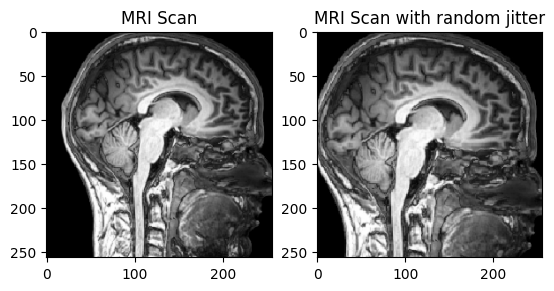

In [28]:
plt.subplot(121)
plt.title('MRI Scan')
plt.imshow(sample_mri[0] * 0.5 + 0.5)

plt.subplot(122)
plt.title('MRI Scan with random jitter')
plt.imshow(random_jitter(sample_mri[0]) * 0.5 + 0.5)

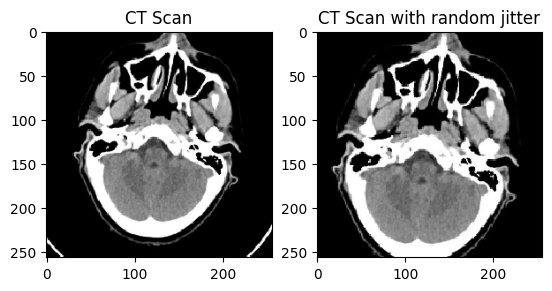

In [29]:
plt.subplot(121)
plt.title('CT Scan')
plt.imshow(sample_ct[0] * 0.5 + 0.5)

plt.subplot(122)
plt.title('CT Scan with random jitter')
plt.imshow(random_jitter(sample_ct[0]) * 0.5 + 0.5)

In [30]:
OUTPUT_CHANNELS = 3

generator_g = pix2pix.unet_generator(OUTPUT_CHANNELS, norm_type='instancenorm')
generator_f = pix2pix.unet_generator(OUTPUT_CHANNELS, norm_type='instancenorm')

discriminator_x = pix2pix.discriminator(norm_type='instancenorm', target=False)
discriminator_y = pix2pix.discriminator(norm_type='instancenorm', target=False)

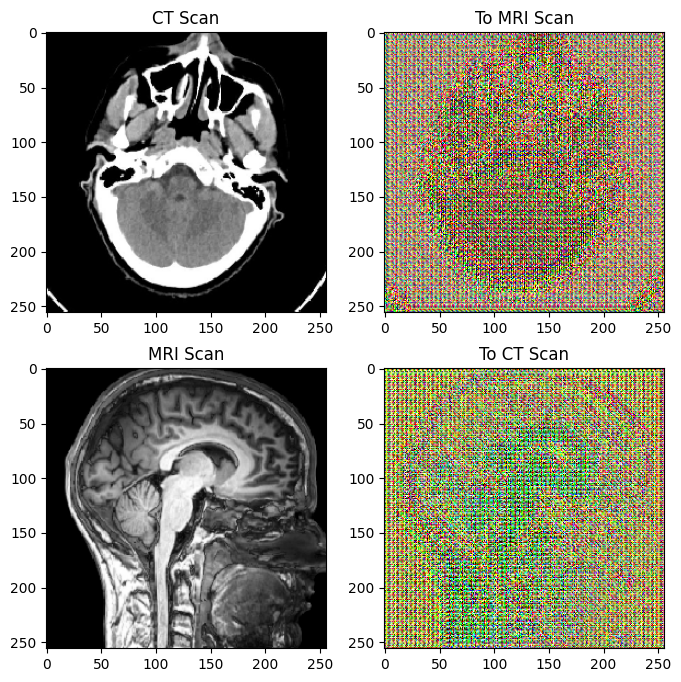

In [31]:
to_mri = generator_g(sample_ct)
to_ct = generator_f(sample_mri)
plt.figure(figsize=(8, 8))
contrast = 8

imgs = [sample_ct, to_mri, sample_mri, to_ct]
title = ['CT Scan', 'To MRI Scan', 'MRI Scan', 'To CT Scan']

for i in range(len(imgs)):
  plt.subplot(2, 2, i+1)
  plt.title(title[i])
  if i % 2 == 0:
    plt.imshow(imgs[i][0] * 0.5 + 0.5)
  else:
    plt.imshow(imgs[i][0] * 0.5 * contrast + 0.5)
plt.show()

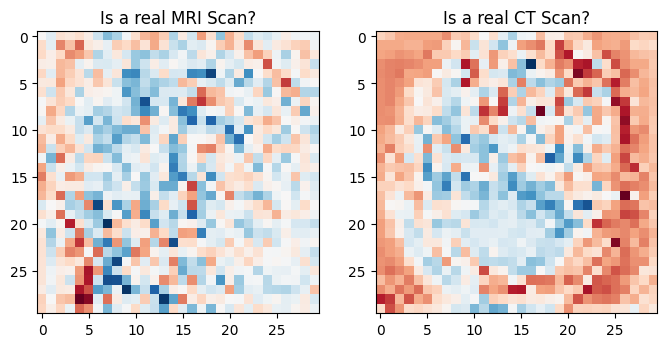

In [32]:
plt.figure(figsize=(8, 8))

plt.subplot(121)
plt.title('Is a real MRI Scan?')
plt.imshow(discriminator_y(sample_mri)[0, ..., -1], cmap='RdBu_r')

plt.subplot(122)
plt.title('Is a real CT Scan?')
plt.imshow(discriminator_x(sample_ct)[0, ..., -1], cmap='RdBu_r')

plt.show()

# loss functions

In [33]:
LAMBDA = 10

In [34]:
loss_obj = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [35]:
def discriminator_loss(real, generated):
  real_loss = loss_obj(tf.ones_like(real), real)

  generated_loss = loss_obj(tf.zeros_like(generated), generated)

  total_disc_loss = real_loss + generated_loss

  return total_disc_loss * 0.5

In [36]:
def generator_loss(generated):
  return loss_obj(tf.ones_like(generated), generated)

In [37]:
def calc_cycle_loss(real_image, cycled_image):
  loss1 = tf.reduce_mean(tf.abs(real_image - cycled_image))

  return LAMBDA * loss1

In [38]:
def identity_loss(real_image, same_image):
  loss = tf.reduce_mean(tf.abs(real_image - same_image))
  return LAMBDA * 0.5 * loss

In [39]:
generator_g_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
generator_f_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

discriminator_x_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_y_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

#Checkpoints

In [40]:
checkpoint_path = "./checkpoints/train"

ckpt = tf.train.Checkpoint(generator_g=generator_g,
                           generator_f=generator_f,
                           discriminator_x=discriminator_x,
                           discriminator_y=discriminator_y,
                           generator_g_optimizer=generator_g_optimizer,
                           generator_f_optimizer=generator_f_optimizer,
                           discriminator_x_optimizer=discriminator_x_optimizer,
                           discriminator_y_optimizer=discriminator_y_optimizer)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

# if a checkpoint exists, restore the latest checkpoint.
if ckpt_manager.latest_checkpoint:
  ckpt.restore(ckpt_manager.latest_checkpoint)
  print ('Latest checkpoint restored!!')

#Training

In [41]:
EPOCHS = 10

In [42]:
def generate_images(model, test_input):
  prediction = model(test_input)

  plt.figure(figsize=(12, 12))

  display_list = [test_input[0], prediction[0]]
  title = ['Input Image', 'Predicted Image']

  for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.title(title[i])
    # getting the pixel values between [0, 1] to plot it.
    plt.imshow(display_list[i] * 0.5 + 0.5)
    plt.axis('off')
  plt.show()

In [43]:
@tf.function
def train_step(real_x, real_y):
  # persistent is set to True because the tape is used more than
  # once to calculate the gradients.
  with tf.GradientTape(persistent=True) as tape:
    # Generator G translates X -> Y
    # Generator F translates Y -> X.

    fake_y = generator_g(real_x, training=True)
    cycled_x = generator_f(fake_y, training=True)

    fake_x = generator_f(real_y, training=True)
    cycled_y = generator_g(fake_x, training=True)

    # same_x and same_y are used for identity loss.
    same_x = generator_f(real_x, training=True)
    same_y = generator_g(real_y, training=True)

    disc_real_x = discriminator_x(real_x, training=True)
    disc_real_y = discriminator_y(real_y, training=True)

    disc_fake_x = discriminator_x(fake_x, training=True)
    disc_fake_y = discriminator_y(fake_y, training=True)

    # calculate the loss
    gen_g_loss = generator_loss(disc_fake_y)
    gen_f_loss = generator_loss(disc_fake_x)

    total_cycle_loss = calc_cycle_loss(real_x, cycled_x) + calc_cycle_loss(real_y, cycled_y)

    # Total generator loss = adversarial loss + cycle loss
    total_gen_g_loss = gen_g_loss + total_cycle_loss + identity_loss(real_y, same_y)
    total_gen_f_loss = gen_f_loss + total_cycle_loss + identity_loss(real_x, same_x)

    disc_x_loss = discriminator_loss(disc_real_x, disc_fake_x)
    disc_y_loss = discriminator_loss(disc_real_y, disc_fake_y)

  # Calculate the gradients for generator and discriminator
  generator_g_gradients = tape.gradient(total_gen_g_loss,
                                        generator_g.trainable_variables)
  generator_f_gradients = tape.gradient(total_gen_f_loss,
                                        generator_f.trainable_variables)

  discriminator_x_gradients = tape.gradient(disc_x_loss,
                                            discriminator_x.trainable_variables)
  discriminator_y_gradients = tape.gradient(disc_y_loss,
                                            discriminator_y.trainable_variables)

  # Apply the gradients to the optimizer
  generator_g_optimizer.apply_gradients(zip(generator_g_gradients,
                                            generator_g.trainable_variables))

  generator_f_optimizer.apply_gradients(zip(generator_f_gradients,
                                            generator_f.trainable_variables))

  discriminator_x_optimizer.apply_gradients(zip(discriminator_x_gradients,
                                                discriminator_x.trainable_variables))

  discriminator_y_optimizer.apply_gradients(zip(discriminator_y_gradients,
                                                discriminator_y.trainable_variables))

In [ ]:
for epoch in range(EPOCHS):
  start = time.time()

  n = 0
  for image_x, image_y in tf.data.Dataset.zip((train_ct, train_mri)):
    train_step(image_x, image_y)
    if n % 10 == 0:
      print ('.', end='')
    n += 1

  clear_output(wait=True)
  # Using a consistent image (sample_ct) so that the progress of the model
  # is clearly visible.
  generate_images(generator_g, sample_ct)

  if (epoch + 1) % 5 == 0:
    ckpt_save_path = ckpt_manager.save()
    print ('Saving checkpoint for epoch {} at {}'.format(epoch+1,
                                                         ckpt_save_path))

  print ('Time taken for epoch {} is {} sec\n'.format(epoch + 1,
                                                      time.time()-start))

.....

#Generate using test data

In [ ]:
# Run the trained model on the test dataset
for inp in test_ct.take(5):
  generate_images(generator_g, inp)